In [606]:
import pandas as pd
import zipfile 
import geopandas as gpd
import numpy as np
import pylab as pl
import os
import requests
import urllib3 as urllib
import urllib.request
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib
import scipy.cluster as scp


pl.rcParams['font.size'] = 20
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

In [21]:
for i in range(15):
    if i < 10:
        os.system("curl https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp0"+str(i)+\
                  "totals.zip > zbp0"+str(i)+"totals.zip")
        os.system("mv zbp0"+str(i)+"totals.zip " + os.getenv("PUIDATA"))
        os.system("unzip " + os.getenv("PUIDATA") + "/zbp0"+str(i)+"totals.zip -d " + os.getenv("PUIDATA"))
    else:
        os.system("curl https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp"+str(i)+\
                  "totals.zip > zbp"+str(i)+"totals.zip")
        os.system("mv zbp"+str(i)+"totals.zip " + os.getenv("PUIDATA"))
        os.system("unzip " + os.getenv("PUIDATA") + "/zbp"+str(i)+"totals.zip -d " + os.getenv("PUIDATA"))

In [22]:
for i in range(94,100):
    os.system("curl https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp"+str(i)+"totals.zip\
    > zbp"+str(i)+"totals.zip")
    os.system("mv zbp"+str(i)+"totals.zip " + os.getenv("PUIDATA"))
    os.system("unzip " + os.getenv("PUIDATA") + "/zbp"+str(i)+"totals.zip -d " + os.getenv("PUIDATA"))

In [29]:
url = 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'

In [32]:
urllib.request.urlretrieve(url, "zipcodes.zip")

('zipcodes.zip', <http.client.HTTPMessage at 0x120fbcda0>)

In [34]:
!unzip zipcodes.zip -d $PUIDATA

Archive:  zipcodes.zip
  inflating: /Users/anaemendezmendez/Documents/NYU_PHD/Fall_2018/PUI2018/PUIDATA/ZIP_CODE_040114.shx  
  inflating: /Users/anaemendezmendez/Documents/NYU_PHD/Fall_2018/PUI2018/PUIDATA/ZIP_CODE_040114.dbf  
  inflating: /Users/anaemendezmendez/Documents/NYU_PHD/Fall_2018/PUI2018/PUIDATA/ZIP_CODE_040114.prj  
  inflating: /Users/anaemendezmendez/Documents/NYU_PHD/Fall_2018/PUI2018/PUIDATA/ZIP_CODE_040114.sbn  
  inflating: /Users/anaemendezmendez/Documents/NYU_PHD/Fall_2018/PUI2018/PUIDATA/ZIP_CODE_040114.sbx  
  inflating: /Users/anaemendezmendez/Documents/NYU_PHD/Fall_2018/PUI2018/PUIDATA/ZIP_CODE_040114.shp  
  inflating: /Users/anaemendezmendez/Documents/NYU_PHD/Fall_2018/PUI2018/PUIDATA/ZIP_CODE_040114.shp.xml  


In [35]:
!mv zipcodes.zip $PUIDATA

In [389]:
zipshp = gpd.GeoDataFrame.from_file("%s/ZIP_CODE_040114.shp" %os.getenv("PUIDATA"))

In [390]:
zipshp.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [391]:
zipshp['ZIPCODE'] = pd.to_numeric(zipshp['ZIPCODE'])

In [392]:
cols_to_drop_shp = [i for i in zipshp.columns.values if i != 'ZIPCODE' and i != 'geometry']
zipshp.drop(cols_to_drop_shp, axis=1, inplace=True)

In [393]:
zipshp.head()

,ZIPCODE,geometry
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [394]:
zipcodes = pd.DataFrame(zipshp['ZIPCODE'])

In [138]:
if 'zip' in df.columns:
    df = df[df['zip'].isin(zipshp['ZIPCODE'])]
else:
    df = df[df['ZIP'].isin(zipshp['ZIPCODE'])]

In [395]:
for i in range(94,100):
    filename = "zbp"+str(i)+"totals.zip"
    df = pd.read_csv(os.getenv("PUIDATA") + '/' +filename)
    
    if 'zip' in df.columns:
        df = df[df['zip'].isin(zipshp['ZIPCODE'])]
        zipshp = zipshp.merge(df, left_on='ZIPCODE', right_on='zip', how='outer')
        zipshp.rename(index=str, columns={"est": os.path.splitext(filename)[0]}, inplace=True)
    else:
        df = df[df['ZIP'].isin(zipshp['ZIPCODE'])]
        zipshp = zipshp.merge(df, left_on='ZIPCODE', right_on='ZIP', how='outer')
        zipshp.rename(index=str, columns={"EST": os.path.splitext(filename)[0]}, inplace=True)

In [396]:
zipshp.head()

,ZIPCODE,geometry,zip_x,name_x,empflag_x,emp_x,qp1_x,ap_x,zbp94totals,zip_y,...,QP1_x,AP_x,zbp98totals,ZIP_y,NAME_y,EMPFLAG_y,EMP_y,QP1_y,AP_y,zbp99totals
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",11436.0,"Jamaica, NY",NaN,545.0,1966.0,8487.0,51.0,11436.0,...,2730.0,12233.0,51.0,11436.0,"JAMAICA, NY",NaN,673.0,2987.0,13658.0,58.0
1,11213,"POLYGON ((1001613.712964058 186926.4395172149,...",11213.0,"Brooklyn, NY",NaN,4025.0,24866.0,108381.0,406.0,11213.0,...,34696.0,144293.0,476.0,11213.0,"BROOKLYN, NY",NaN,4050.0,26729.0,119603.0,473.0
2,11212,"POLYGON ((1011174.275535807 183696.33770971, 1...",11212.0,"Brooklyn, NY",NaN,9983.0,63565.0,277749.0,505.0,11212.0,...,79868.0,334713.0,519.0,11212.0,"BROOKLYN, NY",NaN,10074.0,74717.0,325361.0,541.0
3,11225,"POLYGON ((995908.3654508889 183617.6128015518,...",11225.0,"Brooklyn, NY",NaN,2815.0,13276.0,58610.0,381.0,11225.0,...,15570.0,69267.0,416.0,11225.0,"BROOKLYN, NY",NaN,3165.0,16033.0,68930.0,409.0
4,11218,"POLYGON ((991997.1134308875 176307.4958601296,...",11218.0,"Brooklyn, NY",NaN,8890.0,40196.0,175480.0,985.0,11218.0,...,45565.0,209737.0,1118.0,11218.0,"BROOKLYN, NY",NaN,9711.0,50115.0,223674.0,1149.0


In [397]:
for i in range(15):
    if i < 10:
        filename = "zbp0"+str(i)+"totals.zip"
    else:
        filename = "zbp"+str(i)+"totals.zip"
    df = pd.read_csv(os.getenv("PUIDATA") + '/' +filename)
    
    if 'zip' in df.columns:
        df = df[df['zip'].isin(zipshp['ZIPCODE'])]
        zipshp = zipshp.merge(df, left_on='ZIPCODE', right_on='zip', how='outer')
        zipshp.rename(index=str, columns={"est": os.path.splitext(filename)[0]}, inplace=True)
    else:
        df = df[df['ZIP'].isin(zipshp['ZIPCODE'])]
        zipshp = zipshp.merge(df, left_on='ZIPCODE', right_on='ZIP', how='outer')
        zipshp.rename(index=str, columns={"EST": os.path.splitext(filename)[0]}, inplace=True)
    #zipcodes[os.path.splitext(filename)[0]] = df['EST']

In [398]:
zipshp.head()

,ZIPCODE,geometry,zip_x,name_x,empflag_x,emp_x,qp1_x,ap_x,zbp94totals,zip_y,...,emp_nf_y,emp_y,qp1_nf_y,qp1_y,ap_nf_y,ap_y,zbp14totals,city,stabbr,cty_name
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",11436.0,"Jamaica, NY",NaN,545.0,1966.0,8487.0,51.0,11436.0,...,G,970.0,G,7147.0,G,30719.0,109.0,JAMAICA,NY,QUEENS
1,11213,"POLYGON ((1001613.712964058 186926.4395172149,...",11213.0,"Brooklyn, NY",NaN,4025.0,24866.0,108381.0,406.0,11213.0,...,H,6611.0,H,57876.0,H,236235.0,772.0,BROOKLYN,NY,KINGS
2,11212,"POLYGON ((1011174.275535807 183696.33770971, 1...",11212.0,"Brooklyn, NY",NaN,9983.0,63565.0,277749.0,505.0,11212.0,...,G,9982.0,H,111326.0,H,465191.0,752.0,BROOKLYN,NY,KINGS
3,11225,"POLYGON ((995908.3654508889 183617.6128015518,...",11225.0,"Brooklyn, NY",NaN,2815.0,13276.0,58610.0,381.0,11225.0,...,G,3889.0,G,27211.0,G,118904.0,696.0,BROOKLYN,NY,KINGS
4,11218,"POLYGON ((991997.1134308875 176307.4958601296,...",11218.0,"Brooklyn, NY",NaN,8890.0,40196.0,175480.0,985.0,11218.0,...,G,14469.0,G,99885.0,G,429747.0,1736.0,BROOKLYN,NY,KINGS


In [399]:
cols_to_drop = [i for i in zipshp.columns.values if i != 'zbp94totals' and i != 'ZIPCODE' and i != 'zbp95totals'\
                and i != 'zbp96totals' and i != 'zbp97totals'  and i != 'zbp98totals' and i != 'zbp99totals'\
                and i != 'zbp00totals' and i != 'zbp01totals' and i != 'zbp02totals' and i != 'zbp03totals'\
                and i != 'zbp04totals' and i != 'zbp05totals' and i != 'zbp06totals' and i != 'zbp07totals'\
                and i != 'zbp08totals' and i != 'zbp09totals' and i != 'zbp10totals' and i != 'zbp11totals'\
                and i != 'zbp12totals' and i != 'zbp13totals' and i != 'zbp14totals' and i != 'geometry']
zipshp.drop(cols_to_drop, axis=1, inplace=True)

In [400]:
zipshp

,ZIPCODE,geometry,zbp94totals,zbp95totals,zbp96totals,zbp97totals,zbp98totals,zbp99totals,zbp00totals,zbp01totals,...,zbp05totals,zbp06totals,zbp07totals,zbp08totals,zbp09totals,zbp10totals,zbp11totals,zbp12totals,zbp13totals,zbp14totals
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,...,82.0,80.0,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0
1,11213,"POLYGON ((1001613.712964058 186926.4395172149,...",406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,...,556.0,565.0,556.0,592.0,621.0,675.0,674.0,726.0,755.0,772.0
2,11212,"POLYGON ((1011174.275535807 183696.33770971, 1...",505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,...,587.0,570.0,587.0,602.0,647.0,699.0,713.0,721.0,731.0,752.0
3,11225,"POLYGON ((995908.3654508889 183617.6128015518,...",381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,...,491.0,499.0,514.0,520.0,543.0,580.0,597.0,623.0,673.0,696.0
4,11218,"POLYGON ((991997.1134308875 176307.4958601296,...",985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,...,1332.0,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0
5,11226,"POLYGON ((994821.4729396403 177865.7178093046,...",879.0,882.0,885.0,904.0,942.0,923.0,917.0,884.0,...,1049.0,1015.0,1049.0,1083.0,1097.0,1127.0,1169.0,1229.0,1256.0,1283.0
6,11219,"POLYGON ((987286.3515269756 173946.4621963799,...",1650.0,1708.0,1768.0,1863.0,1928.0,1997.0,2079.0,2153.0,...,2343.0,2351.0,2391.0,2396.0,2487.0,2581.0,2647.0,2696.0,2777.0,2882.0
7,11210,"POLYGON ((995796.0097044706 171110.0666224658,...",763.0,783.0,779.0,806.0,815.0,776.0,792.0,816.0,...,875.0,893.0,887.0,906.0,919.0,990.0,1030.0,1006.0,1003.0,1026.0
8,11230,"POLYGON ((994099.2959063053 171240.7064530551,...",1411.0,1465.0,1537.0,1563.0,1605.0,1670.0,1753.0,1807.0,...,1930.0,1934.0,1934.0,1945.0,1984.0,2026.0,2062.0,1999.0,2095.0,2150.0
9,11204,"POLYGON ((989500.1699339747 170730.1687602103,...",1287.0,1297.0,1334.0,1374.0,1444.0,1481.0,1656.0,1686.0,...,1778.0,1806.0,1858.0,1826.0,1817.0,1902.0,1960.0,2024.0,2108.0,2205.0


In [401]:
zipshp.set_index('ZIPCODE', inplace=True)

In [408]:
zipshp.head()

,geometry,zbp94totals,zbp95totals,zbp96totals,zbp97totals,zbp98totals,zbp99totals,zbp00totals,zbp01totals,zbp02totals,...,zbp05totals,zbp06totals,zbp07totals,zbp08totals,zbp09totals,zbp10totals,zbp11totals,zbp12totals,zbp13totals,zbp14totals
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
11436,"POLYGON ((1038098.251871482 188138.3800067157,...",51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,...,82.0,80.0,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0
11213,"POLYGON ((1001613.712964058 186926.4395172149,...",406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,...,556.0,565.0,556.0,592.0,621.0,675.0,674.0,726.0,755.0,772.0
11212,"POLYGON ((1011174.275535807 183696.33770971, 1...",505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,...,587.0,570.0,587.0,602.0,647.0,699.0,713.0,721.0,731.0,752.0
11225,"POLYGON ((995908.3654508889 183617.6128015518,...",381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,...,491.0,499.0,514.0,520.0,543.0,580.0,597.0,623.0,673.0,696.0
11218,"POLYGON ((991997.1134308875 176307.4958601296,...",985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,...,1332.0,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0


In [403]:
zipshp.dropna(axis=0,how='any',inplace=True)

In [404]:
zipshp.shape

(243, 22)

In [405]:
zipcodes = zipshp.drop('geometry', axis=1)

In [407]:
zipcodes.head()

,zbp94totals,zbp95totals,zbp96totals,zbp97totals,zbp98totals,zbp99totals,zbp00totals,zbp01totals,zbp02totals,zbp03totals,...,zbp05totals,zbp06totals,zbp07totals,zbp08totals,zbp09totals,zbp10totals,zbp11totals,zbp12totals,zbp13totals,zbp14totals
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
11436,51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,74.0,...,82.0,80.0,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0
11213,406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,569.0,...,556.0,565.0,556.0,592.0,621.0,675.0,674.0,726.0,755.0,772.0
11212,505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,581.0,...,587.0,570.0,587.0,602.0,647.0,699.0,713.0,721.0,731.0,752.0
11225,381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,488.0,...,491.0,499.0,514.0,520.0,543.0,580.0,597.0,623.0,673.0,696.0
11218,985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,1247.0,...,1332.0,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0


In [409]:
vals = ((zipcodes.T - zipcodes.mean(1)) / zipcodes.std(1)).T

In [410]:
vals.mean(axis=1)

ZIPCODE
11436   -3.595008e-16
11213   -1.268826e-16
11212    4.652363e-16
11225   -1.903239e-16
11218   -2.537653e-16
11226    7.084280e-16
11219   -2.008975e-16
11210   -3.912214e-16
11230    2.537653e-16
11204    4.863834e-16
10471    4.229421e-17
10470   -1.448577e-15
10466    6.026925e-16
10467    8.141636e-16
10463    1.903239e-16
10463    1.903239e-16
10475   -5.286776e-17
10464   -1.173664e-15
10464   -1.173664e-15
10464   -1.173664e-15
10469    3.595008e-16
10468    1.163091e-16
10458    6.132661e-16
10034    1.480297e-16
10033   -5.921189e-16
10462   -6.132661e-16
10040   -4.335157e-16
10453    5.709718e-16
10465   -7.612958e-16
10461   -2.003688e-15
             ...     
10172   -2.580401e-16
10171    1.903239e-16
10270    8.458842e-17
10104    0.000000e+00
10271    1.453863e-16
10110    1.268826e-16
10175    6.608470e-16
10151    3.172066e-17
10173    7.930164e-17
10178   -6.714206e-16
10121    4.652363e-16
10123    2.326182e-16
10106    4.229421e-16
10158   -3.119198e-16
10

In [411]:
vals.mean(axis=1).shape 

(243,)

In [412]:
vals.std(axis=1)

ZIPCODE
11436    1.0
11213    1.0
11212    1.0
11225    1.0
11218    1.0
11226    1.0
11219    1.0
11210    1.0
11230    1.0
11204    1.0
10471    1.0
10470    1.0
10466    1.0
10467    1.0
10463    1.0
10463    1.0
10475    1.0
10464    1.0
10464    1.0
10464    1.0
10469    1.0
10468    1.0
10458    1.0
10034    1.0
10033    1.0
10462    1.0
10040    1.0
10453    1.0
10465    1.0
10461    1.0
        ... 
10172    1.0
10171    1.0
10270    1.0
10104    1.0
10271    1.0
10110    1.0
10175    1.0
10151    1.0
10173    1.0
10178    1.0
10121    1.0
10123    1.0
10106    1.0
10158    1.0
10041    1.0
10120    1.0
10278    1.0
10155    1.0
10043    1.0
10081    1.0
10080    1.0
10285    1.0
10286    1.0
11371    1.0
11361    1.0
10036    1.0
11414    1.0
10310    1.0
10162    1.0
10119    1.0
Length: 243, dtype: float64

In [413]:
vals.std(axis=1).shape

(243,)

# KMEANS Clustering

In [414]:
date_range = pd.date_range('01/01/1994', '12/31/2014', freq='Y')

In [415]:
date_range

DatetimeIndex(['1994-12-31', '1995-12-31', '1996-12-31', '1997-12-31',
               '1998-12-31', '1999-12-31', '2000-12-31', '2001-12-31',
               '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31',
               '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

## NC = 3

In [416]:
nc = 3

In [417]:
km = KMeans(n_clusters=nc, random_state=444).fit(vals)

In [418]:
km.labels_.shape

(243,)

In [419]:
cluster_centers = km.cluster_centers_

In [420]:
cluster_centers.shape

(3, 21)

In [421]:
y = KMeans(n_clusters=nc, random_state=444).fit_predict(vals)

In [422]:
vals.shape

(243, 21)

In [423]:
vals_array = vals.values

In [424]:
vals_array.shape

(243, 21)

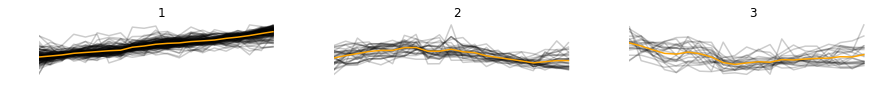

In [425]:
fig=pl.figure(figsize=(15,1))

for cluster in range(cluster_centers.shape[0]):
    pl.subplot(1, 3, 1 + cluster)
    for i in vals_array[y == cluster]:
        pl.plot(np.arange(len(date_range)), i, c='k', alpha=0.2)
    pl.plot(np.arange(len(date_range)), cluster_centers[cluster], c='orange')
    pl.xlim(0, vals.shape[1])
    pl.axis('off')
    pl.title((cluster + 1))

#### Figure 1. Time series plot by clusters based on KMeans clustering method with 3 clusters. The orange line is shows the center of the clusters.

## NC = 4

In [426]:
nc = 4

In [427]:
km = KMeans(n_clusters=nc, random_state=444).fit(vals)

In [428]:
km.labels_.shape

(243,)

In [429]:
cluster_centers = km.cluster_centers_

In [430]:
cluster_centers.shape

(4, 21)

In [431]:
y = KMeans(n_clusters=nc, random_state=444).fit_predict(vals)

In [432]:
vals.shape

(243, 21)

In [433]:
vals_array = vals.values

In [434]:
vals_array.shape

(243, 21)

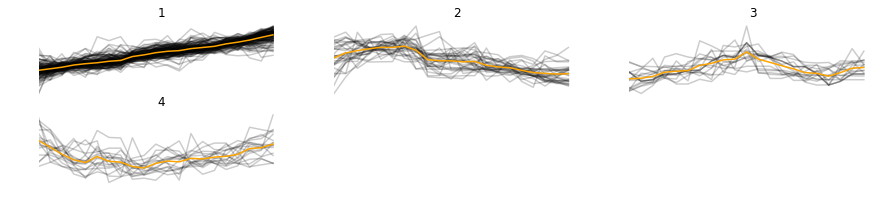

In [435]:
fig=pl.figure(figsize=(15,3))

for cluster in range(cluster_centers.shape[0]):
    pl.subplot(2, 3, 1 + cluster)
    for i in vals_array[y == cluster]:
        pl.plot(np.arange(len(date_range)), i, c='k', alpha=0.2)
    pl.plot(np.arange(len(date_range)), cluster_centers[cluster], c='orange')
    pl.xlim(0, vals.shape[1])
    pl.axis('off')
    pl.title((cluster + 1))

#### Figure 2. Time series plot by clusters based on KMeans clustering method with 4 clusters. The orange line is shows the center of the clusters.

## NC = 5

In [436]:
nc = 5

In [437]:
km = KMeans(n_clusters=nc, random_state=444).fit(vals)

In [438]:
km.labels_.shape

(243,)

In [439]:
cluster_centers = km.cluster_centers_

In [440]:
cluster_centers.shape

(5, 21)

In [441]:
y = KMeans(n_clusters=nc, random_state=444).fit_predict(vals)

In [442]:
vals.shape

(243, 21)

In [443]:
vals_array = vals.values

In [444]:
vals_array.shape

(243, 21)

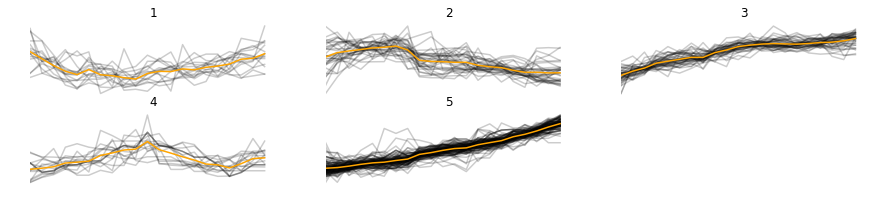

In [445]:
fig=pl.figure(figsize=(15,3))

for cluster in range(cluster_centers.shape[0]):
    pl.subplot(2, 3, 1 + cluster)
    for i in vals_array[y == cluster]:
        pl.plot(np.arange(len(date_range)), i, c='k', alpha=0.2)
    pl.plot(np.arange(len(date_range)), cluster_centers[cluster], c='orange')
    pl.xlim(0, vals.shape[1])
    pl.axis('off')
    pl.title((cluster + 1))

#### Figure 3. Time series plot by clusters based on KMeans clustering method with 5 clusters. The orange line is shows the center of the clusters.

In [446]:
zipshp['kmeans'] = y

In [449]:
zipshp.head()

,geometry,zbp94totals,zbp95totals,zbp96totals,zbp97totals,zbp98totals,zbp99totals,zbp00totals,zbp01totals,zbp02totals,...,zbp06totals,zbp07totals,zbp08totals,zbp09totals,zbp10totals,zbp11totals,zbp12totals,zbp13totals,zbp14totals,kmeans
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
11436,"POLYGON ((1038098.251871482 188138.3800067157,...",51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,...,80.0,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0,4
11213,"POLYGON ((1001613.712964058 186926.4395172149,...",406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,...,565.0,556.0,592.0,621.0,675.0,674.0,726.0,755.0,772.0,4
11212,"POLYGON ((1011174.275535807 183696.33770971, 1...",505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,...,570.0,587.0,602.0,647.0,699.0,713.0,721.0,731.0,752.0,4
11225,"POLYGON ((995908.3654508889 183617.6128015518,...",381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,...,499.0,514.0,520.0,543.0,580.0,597.0,623.0,673.0,696.0,4
11218,"POLYGON ((991997.1134308875 176307.4958601296,...",985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,...,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0,4


(905410.7560429364, 1075212.5382562785, 112386.35181947277, 280345.454023955)

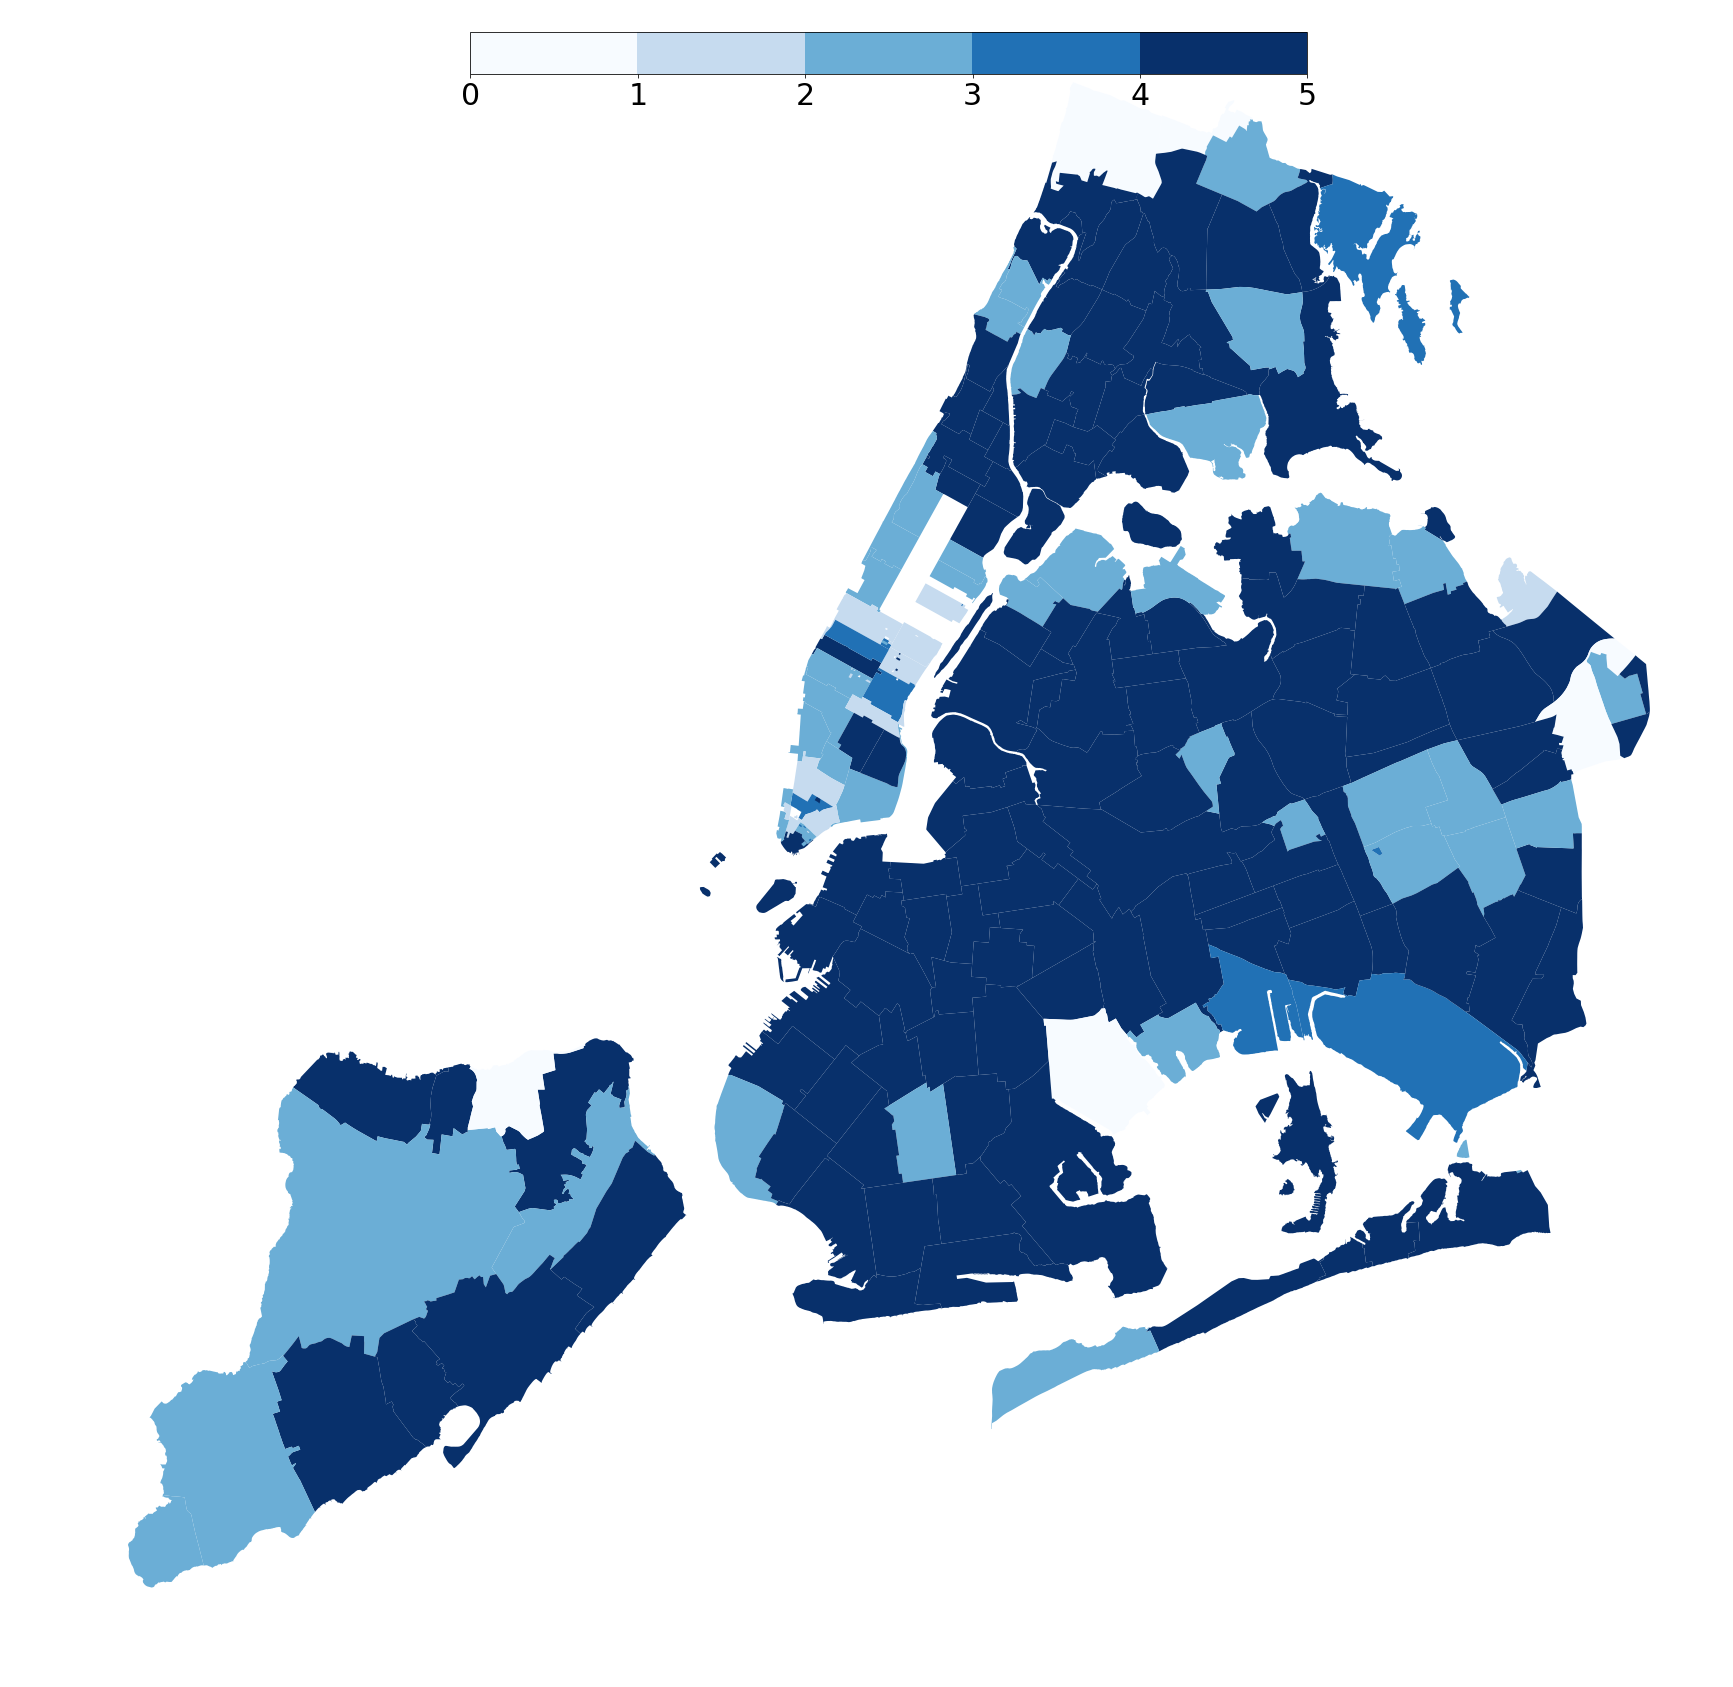

In [582]:
fig = pl.figure(figsize=(30,50))
ax = fig.add_subplot(111)
cmap = plt.get_cmap('Blues', nc)

zipshp.plot('kmeans', ax=ax, cmap=cmap)
sm = pl.cm.ScalarMappable(norm=matplotlib.colors.BoundaryNorm(np.arange(0,nc+1), cmap.N), cmap=cmap)
sm._A = []
cbar = fig.colorbar(sm, orientation='horizontal',shrink=0.5, pad=-0.6)
cbar.ax.tick_params(labelsize=30)
ax.axis('off')


#### Figure 4. NYC map with zip codes colored by cluster. 5 clusters were used for this map, showing that most of Brooklyn, Queens and The Bronx are grouped into the same cluster for the number of establishments per zip code.

# Agglomerative Clustering

In [603]:
zipcode_values = zipcodes.index.values

## NC = 5

In [626]:
nc = 5

In [627]:
agc = AgglomerativeClustering(n_clusters=nc, linkage='average').fit(vals)
labelsag = agc.labels_
centroidsag = np.zeros((nc, vals.shape[1]))

In [628]:
agc.labels_.shape

(243,)

In [629]:
y_agc = AgglomerativeClustering(n_clusters=nc, linkage='average').fit_predict(vals)

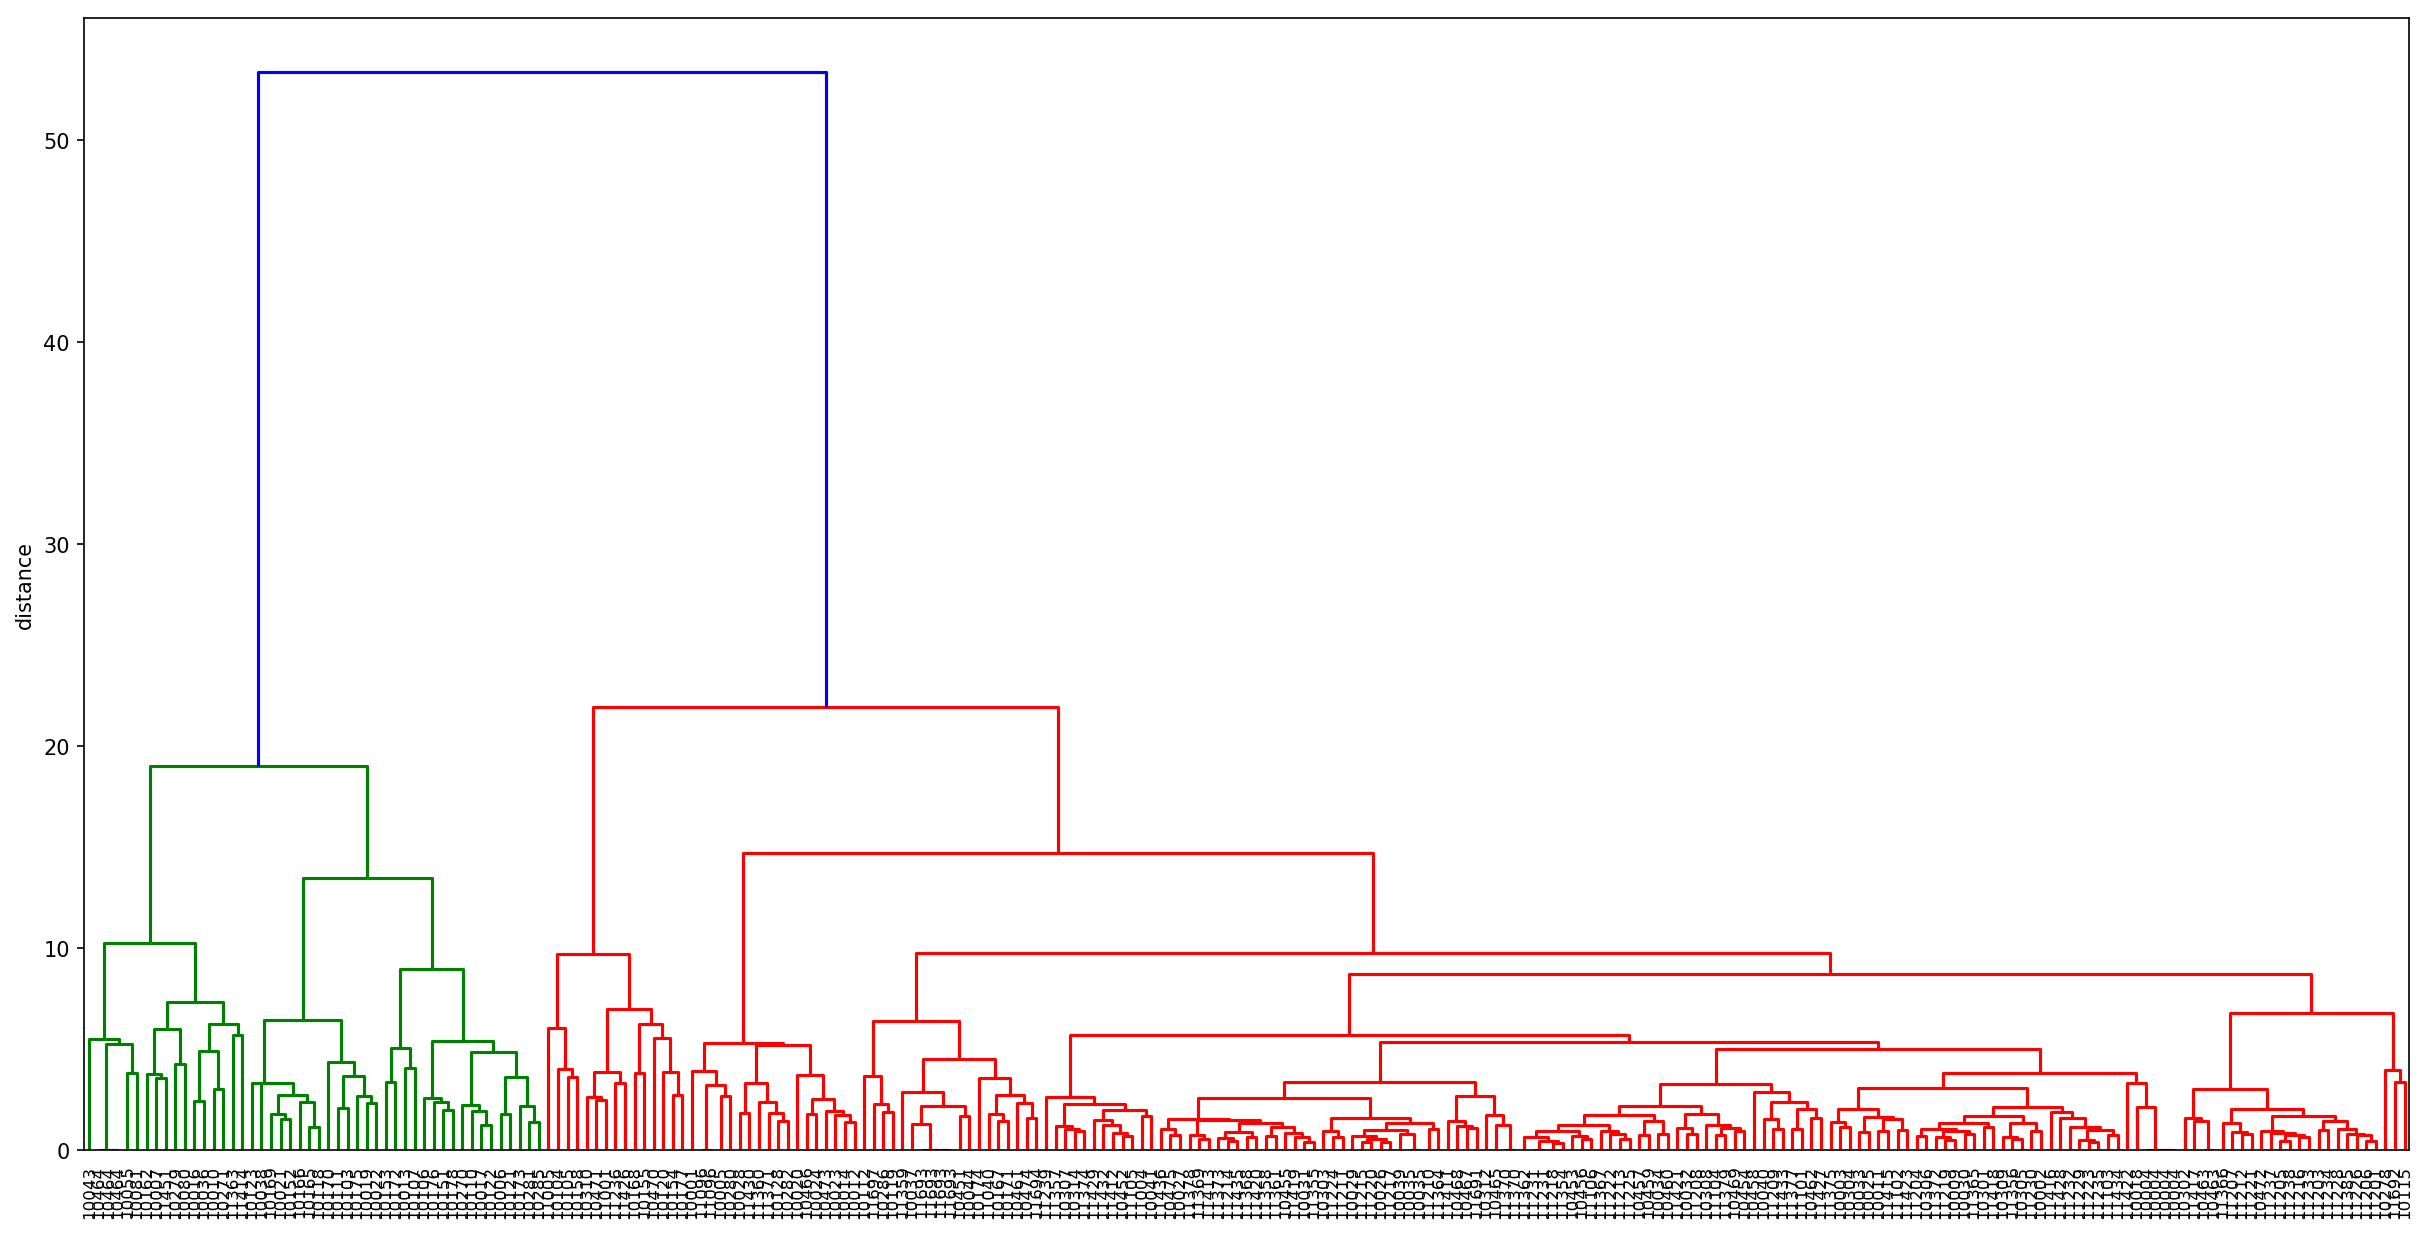

In [630]:
fig = pl.figure(figsize=(20,10), dpi=150)
pl.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals, method='ward'),
                               labels = zipcode_values,
                               leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=8.)

#### Figure 5. Dandrogram for Agglomerative clustering method with 5 clusters.

In [631]:
zipshp['aggcl'] = y_agc

In [632]:
zipshp.head()

,geometry,zbp94totals,zbp95totals,zbp96totals,zbp97totals,zbp98totals,zbp99totals,zbp00totals,zbp01totals,zbp02totals,...,zbp07totals,zbp08totals,zbp09totals,zbp10totals,zbp11totals,zbp12totals,zbp13totals,zbp14totals,kmeans,aggcl
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
11436,"POLYGON ((1038098.251871482 188138.3800067157,...",51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,...,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0,4,2
11213,"POLYGON ((1001613.712964058 186926.4395172149,...",406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,...,556.0,592.0,621.0,675.0,674.0,726.0,755.0,772.0,4,2
11212,"POLYGON ((1011174.275535807 183696.33770971, 1...",505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,...,587.0,602.0,647.0,699.0,713.0,721.0,731.0,752.0,4,2
11225,"POLYGON ((995908.3654508889 183617.6128015518,...",381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,...,514.0,520.0,543.0,580.0,597.0,623.0,673.0,696.0,4,2
11218,"POLYGON ((991997.1134308875 176307.4958601296,...",985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,...,1377.0,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0,4,2


(905410.7560429364, 1075212.5382562785, 112386.35181947277, 280345.454023955)

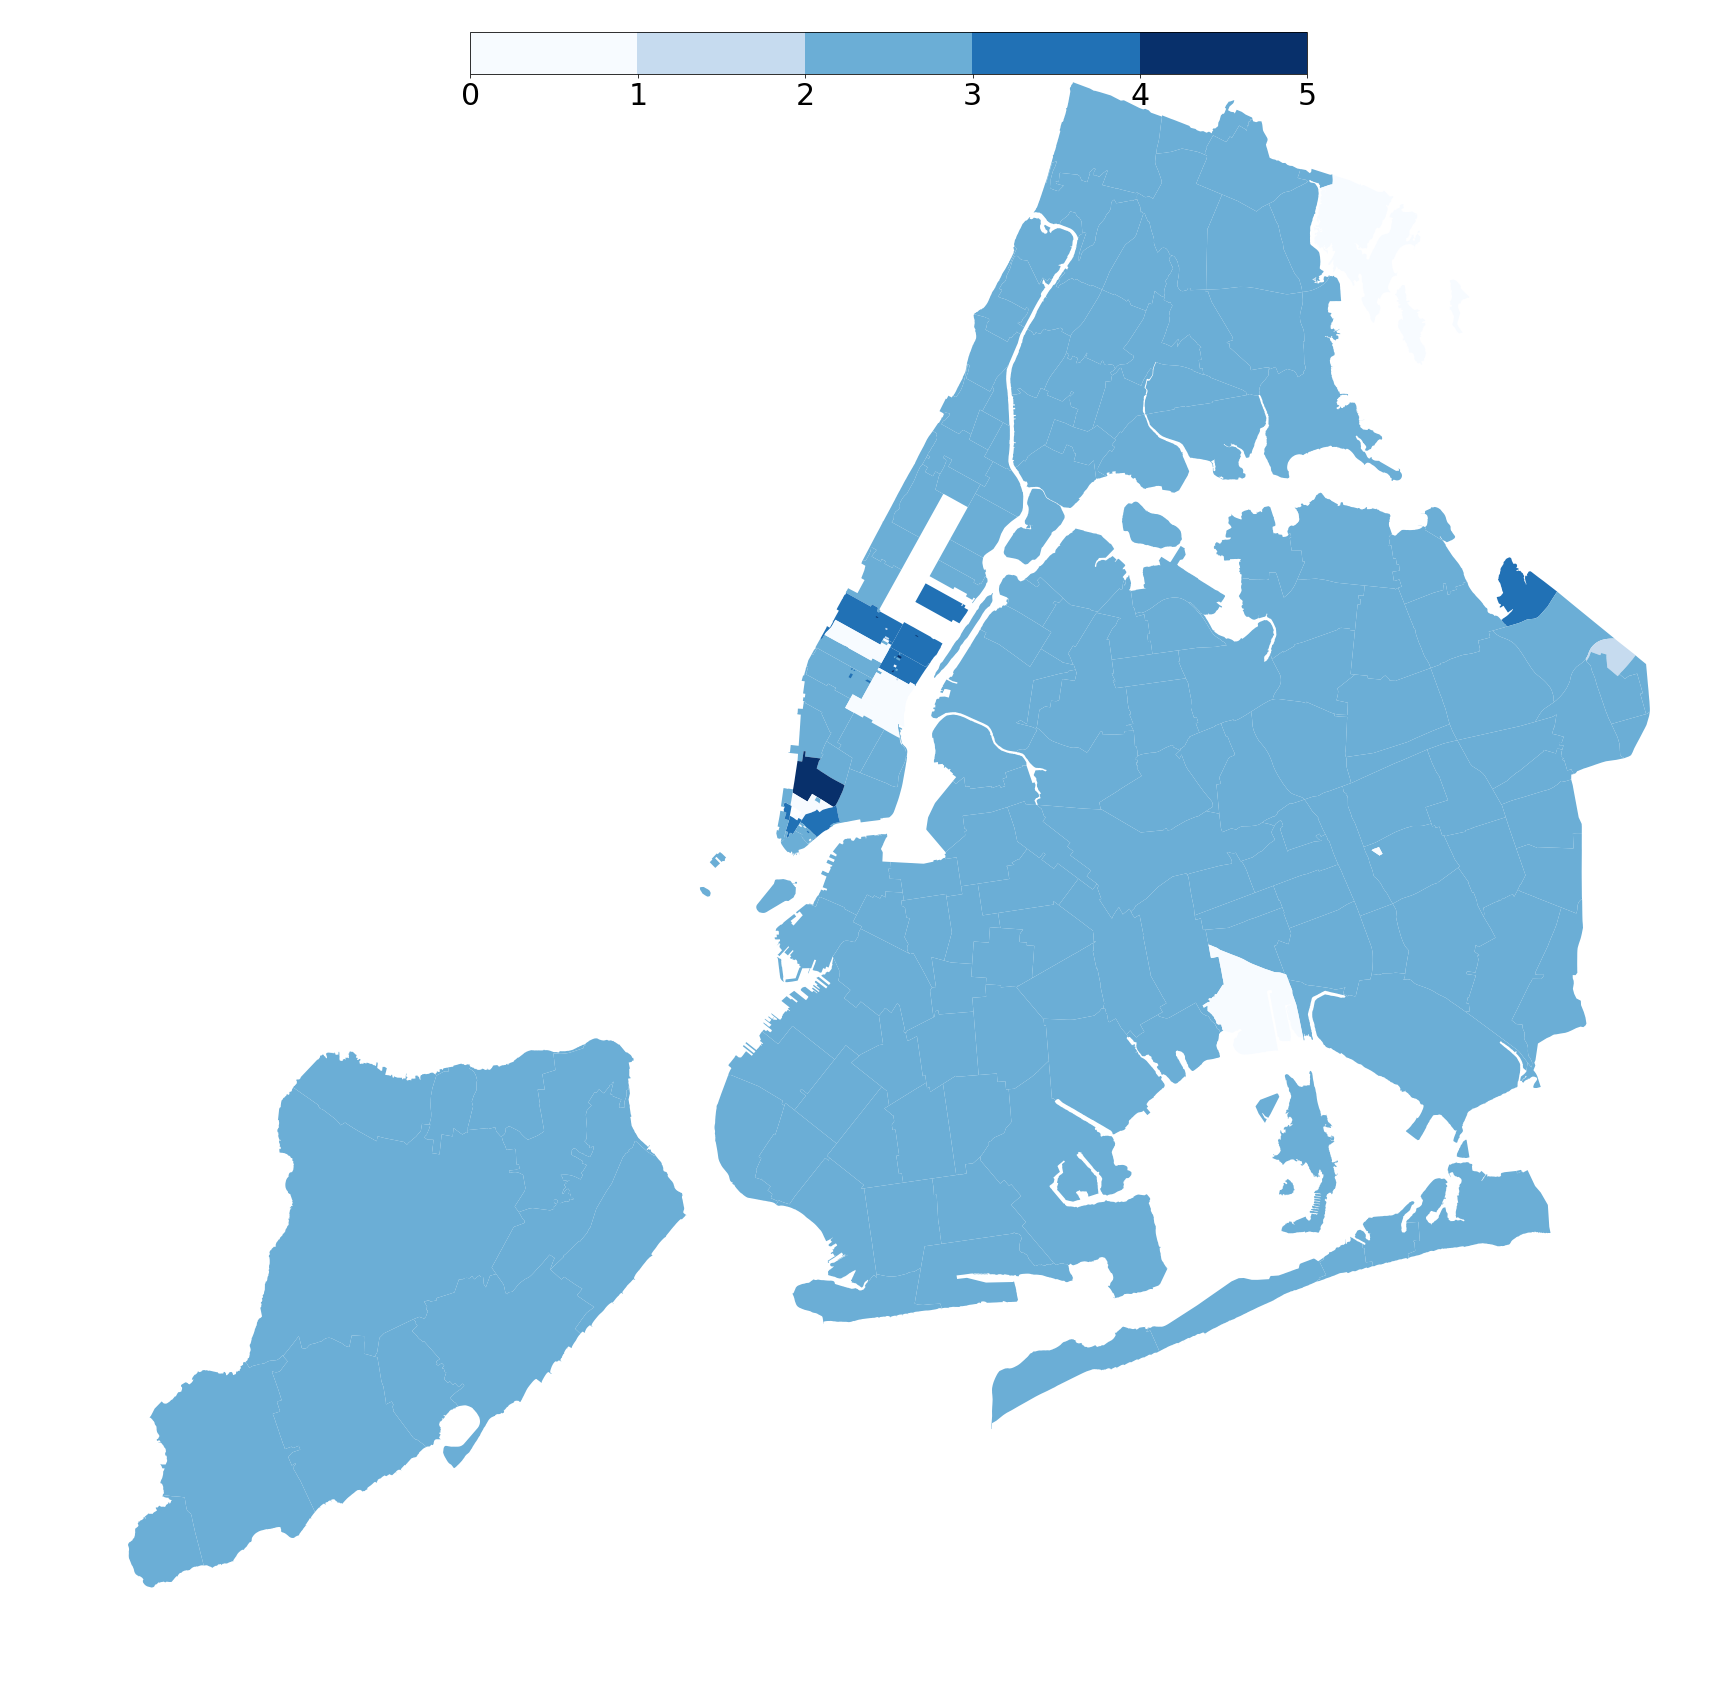

In [634]:
fig = pl.figure(figsize=(30,50))
ax = fig.add_subplot(111)
cmap = plt.get_cmap('Blues', nc)

zipshp.plot('aggcl', ax=ax, cmap=cmap)
sm = pl.cm.ScalarMappable(norm=matplotlib.colors.BoundaryNorm(np.arange(0,nc+1), cmap.N), cmap=cmap)
sm._A = []
cbar = fig.colorbar(sm, orientation='horizontal',shrink=0.5, pad=-0.6)
cbar.ax.tick_params(labelsize=30)
ax.axis('off')

#### Figure 6. NYC map with zip codes colored by cluster. 5 clusters were used for this map, to see if it was comparable to figure 4. Contrary to figure 4, this map shows that most of NYC is grouped into the same cluster for the number of establishments per zip code, except some zip codes in Manhattan.

## NC = 9

In [635]:
nc = 9

In [636]:
agc = AgglomerativeClustering(n_clusters=nc, linkage='average').fit(vals)
labelsag = agc.labels_
centroidsag = np.zeros((nc, vals.shape[1]))

In [637]:
agc.labels_.shape

(243,)

In [638]:
y_agc = AgglomerativeClustering(n_clusters=nc, linkage='average').fit_predict(vals)

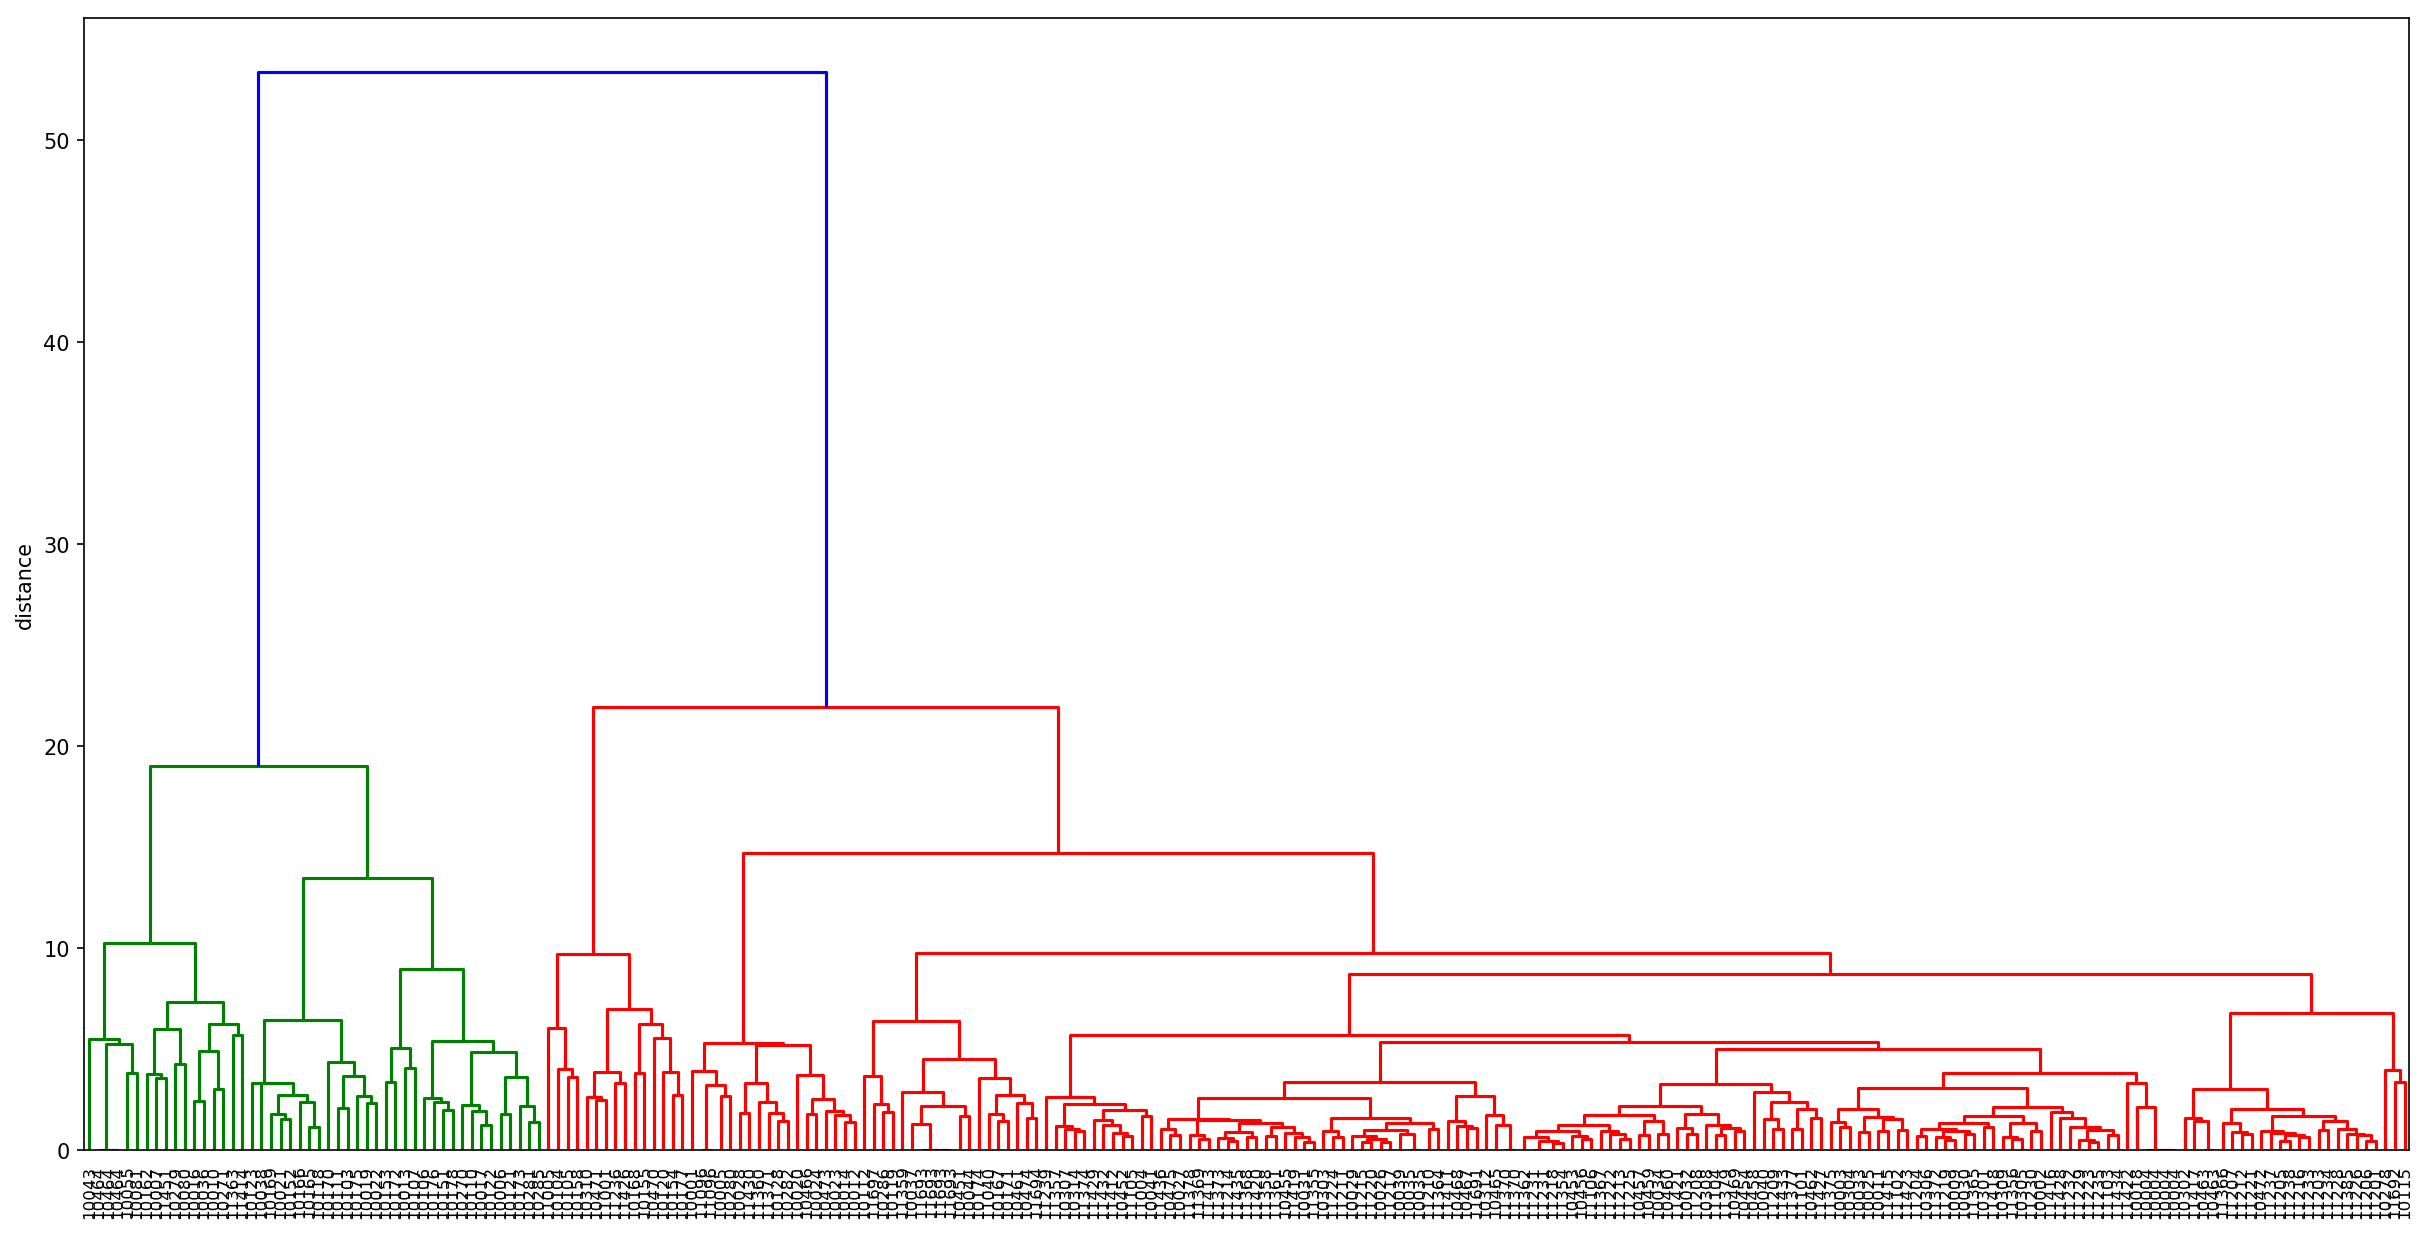

In [639]:
fig = pl.figure(figsize=(20,10), dpi=150)
pl.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals, method='ward'),
                               labels = zipcode_values,
                               leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=8.)

#### Figure 7. Dandrogram for Agglomerative clustering method with 9 clusters.

In [640]:
zipshp['aggcl_10'] = y_agc

In [641]:
zipshp.head()

,geometry,zbp94totals,zbp95totals,zbp96totals,zbp97totals,zbp98totals,zbp99totals,zbp00totals,zbp01totals,zbp02totals,...,zbp08totals,zbp09totals,zbp10totals,zbp11totals,zbp12totals,zbp13totals,zbp14totals,kmeans,aggcl,aggcl_10
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
11436,"POLYGON ((1038098.251871482 188138.3800067157,...",51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,...,90.0,92.0,98.0,101.0,95.0,99.0,109.0,4,2,4
11213,"POLYGON ((1001613.712964058 186926.4395172149,...",406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,...,592.0,621.0,675.0,674.0,726.0,755.0,772.0,4,2,4
11212,"POLYGON ((1011174.275535807 183696.33770971, 1...",505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,...,602.0,647.0,699.0,713.0,721.0,731.0,752.0,4,2,4
11225,"POLYGON ((995908.3654508889 183617.6128015518,...",381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,...,520.0,543.0,580.0,597.0,623.0,673.0,696.0,4,2,4
11218,"POLYGON ((991997.1134308875 176307.4958601296,...",985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,...,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0,4,2,4


(905410.7560429364, 1075212.5382562785, 112386.35181947277, 280345.454023955)

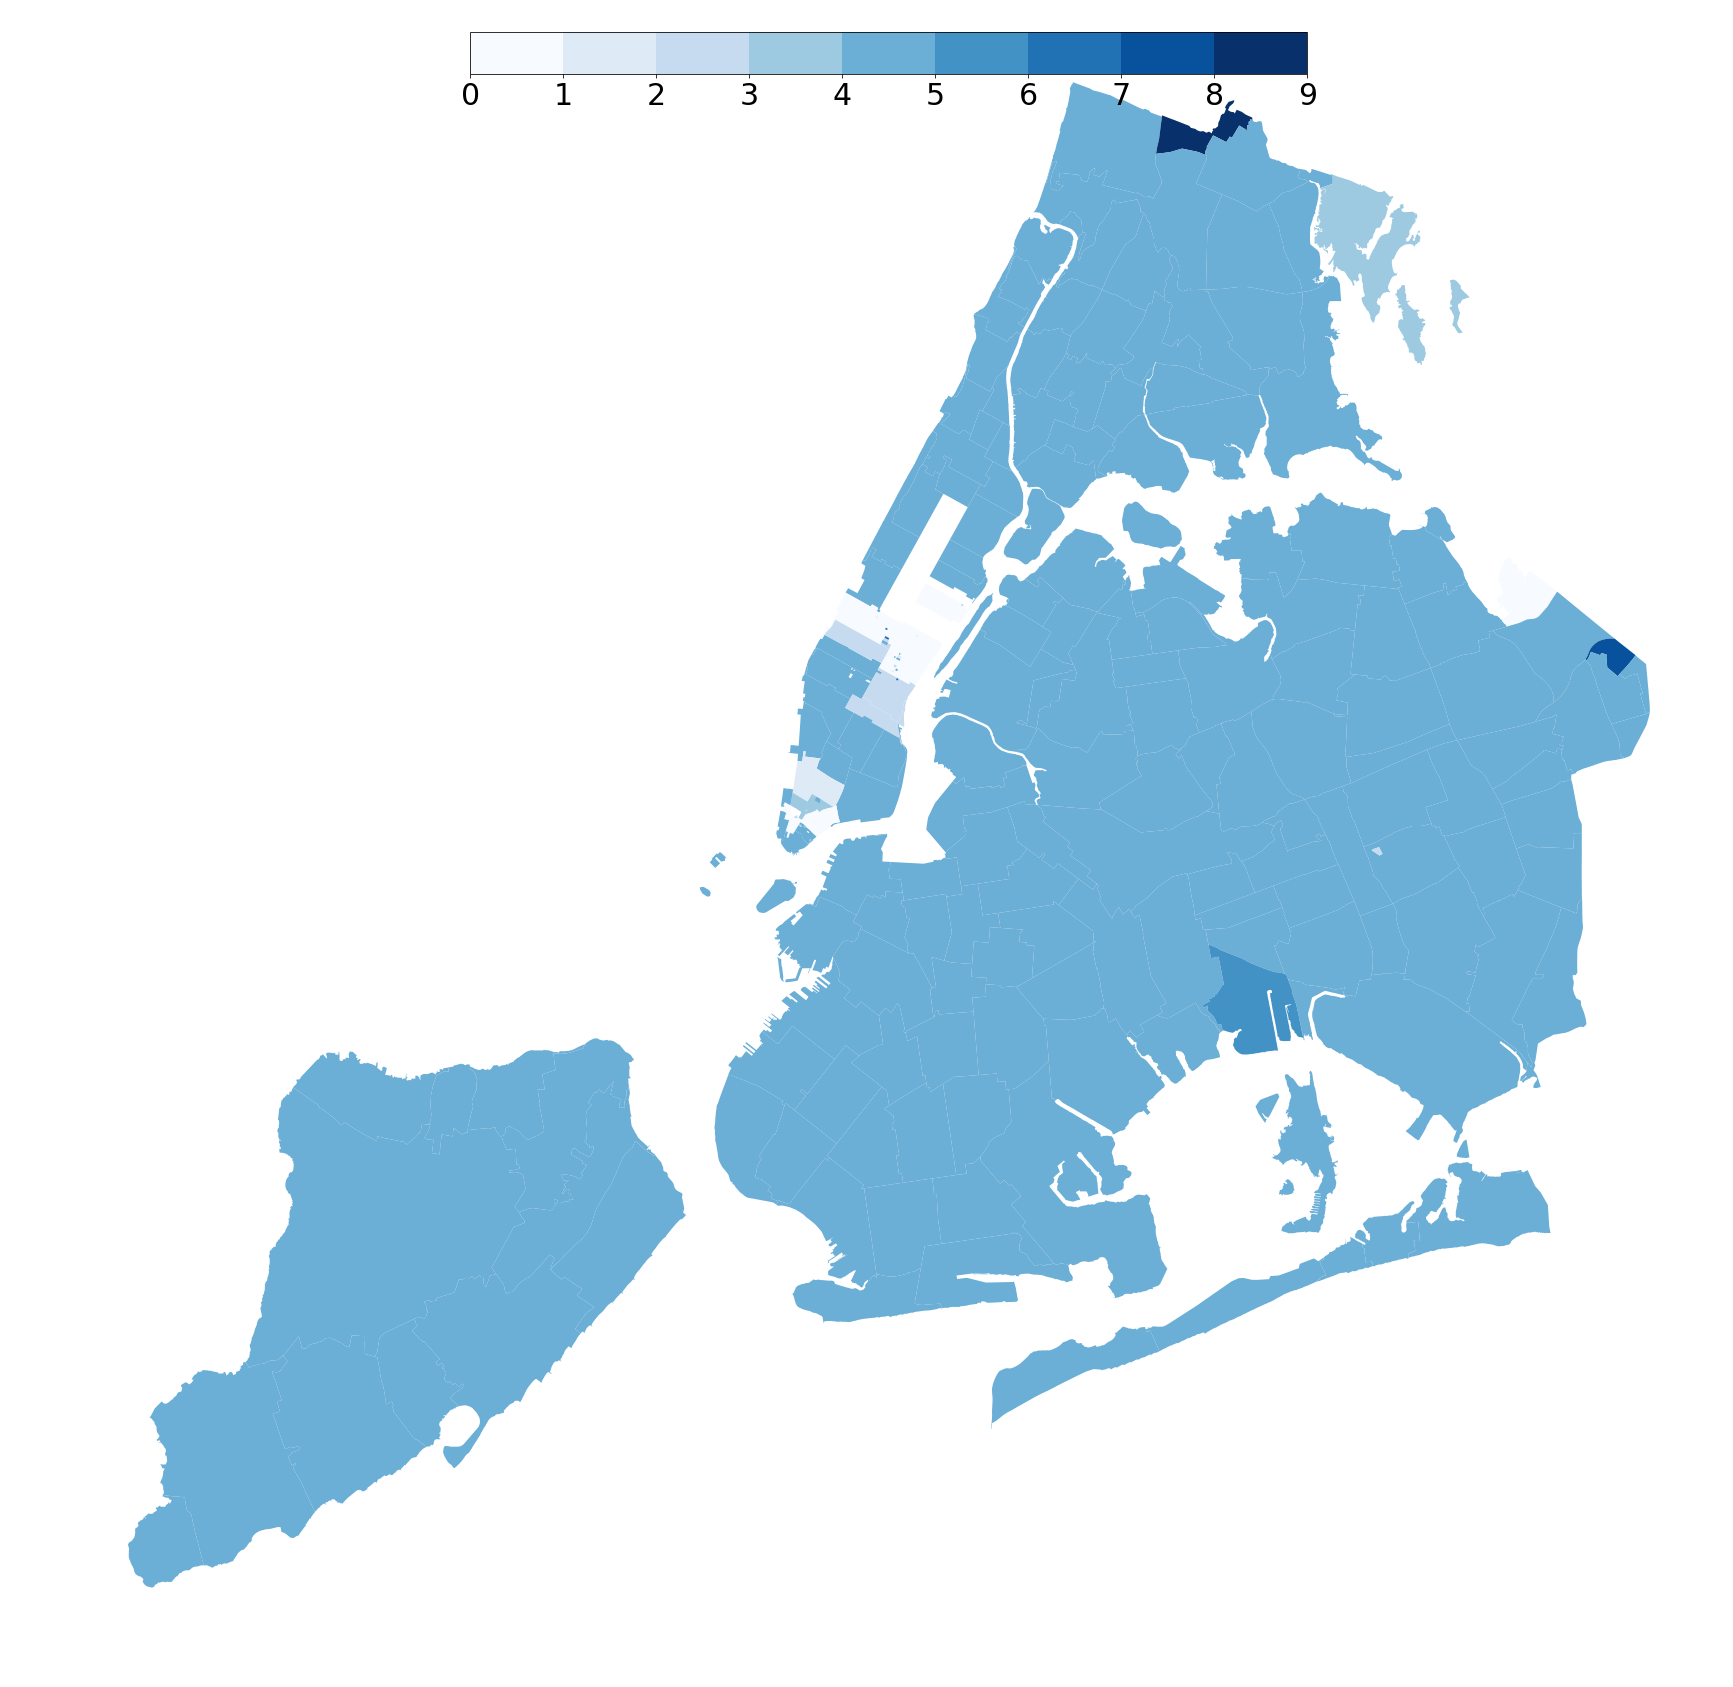

In [642]:
fig = pl.figure(figsize=(30,50))
ax = fig.add_subplot(111)
cmap = plt.get_cmap('Blues', nc)

zipshp.plot('aggcl_10', ax=ax, cmap=cmap)
sm = pl.cm.ScalarMappable(norm=matplotlib.colors.BoundaryNorm(np.arange(0,nc+1), cmap.N), cmap=cmap)
sm._A = []
cbar = fig.colorbar(sm, orientation='horizontal',shrink=0.5, pad=-0.6)
cbar.ax.tick_params(labelsize=30)
ax.axis('off')

#### Figure 8. NYC map with zip codes colored by cluster. 10 clusters were used for this map, to see if it was comparable to figure 4. Contrary to figure 4, and just like figure 6, this map shows that most of NYC is grouped into the same cluster for the number of establishments per zip code, except some zip codes in Manhattan.

These NYC maps show that we can see some clusters based on the amount of establishments in each NYC zip code. However, the groups generated by each clustering method are very different and give very different results. In the case of the K Means, we see more diversity in the groups, while the Agglomerative clustering groups most of the data into only one cluster. In my opinion based on whe way NYC is, I believe that the KMeans clustering provides more useful information and that we can take those clusters to take a closer look at our data and see if the groups make sense.